# Venta de Viviendas en Seattle; Modelización Predicitiva - Regresión Lineal.

## Modelo de Regresión Lineal
Como primera instancia, se hará uso de un modelo de regresión lineal por ser una técnica tradicional, simple y adecuada para problemas de predicción de variables continuas, además, de su alta capacidad de explicabilidad. Dado que el dataset es sencillo y presenta una estructura limpia y relaciones aproximadamente lineales entre algunas variables independientes y la variable objetivo que posteriormente veremos, este modelo resulta adecuado como punto de partida por su simplicidad, rapidez de entrenamiento y utilidad como línea base comparativa frente a modelos más complejos.

Importamos y cargamos las librerías necesarias para trabajar.

In [1]:
# Procesamiento y visualizacion de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelado
import statsmodels.api as sm
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from relativeImp import relativeImp
import shap

# Otros
import json

Leemos el archivo .csv guardado con el dataset depurado.

In [2]:
df = pd.read_csv('C:/Users/jeje9/Projects/Housing Sales Seattle/data/freeze_data/df_imputed_trf.csv')

In [3]:
df

,month,Luxury,floors,bedrooms,bathrooms,basement,view,waterfront,condition,sqft_lot,sqft_living,sqft_above,yr_built,renovated,lat,long,dist_to_center,price
0,"[4.50, 7.50)",1,"(-inf, 1.25)","[2.50, 3.50)","[1.75, 2.75)",1,0,0,C,25.526560,10.462583,3.831498,"[1949.50, 1994.50)",0,47.5936,-122.013,0.199957,3.938989
1,"[4.50, 7.50)",1,"[1.25, 1.75)","(-inf, 2.50)","[1.25, 1.75)",1,0,0,A,19.718707,10.042106,3.831498,"(-inf, 1940.50)",0,47.6624,-122.325,0.133557,3.942111
2,"[7.50, inf)",1,"(-inf, 1.25)","[3.50, 4.50)","[3.25, inf)",0,1,0,B,23.299890,11.555784,4.015587,"[1994.50, 2009.50)",0,47.3216,-121.940,0.382622,3.945572
3,"[7.50, inf)",1,"[1.75, inf)","[2.50, 3.50)","[3.25, inf)",1,0,0,B,19.705543,10.623168,3.876046,"[1994.50, 2009.50)",0,47.6422,-122.361,0.157088,3.946264
4,"[7.50, inf)",0,"(-inf, 1.25)","[2.50, 3.50)","[1.75, 2.75)",1,0,0,A,23.577734,10.444897,3.767129,"[1949.50, 1994.50)",0,47.7447,-122.328,0.192996,3.919169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"(-inf, 2.50)",0,"[1.75, inf)","(-inf, 2.50)","[1.75, 2.75)",1,0,0,B,16.231463,9.748085,3.769177,"[1994.50, 2009.50)",0,47.5537,-122.282,0.077928,3.915803
4996,"(-inf, 2.50)",0,"(-inf, 1.25)","[3.50, 4.50)","[1.75, 2.75)",0,0,0,B,23.133064,10.063805,3.848465,"[1949.50, 1994.50)",0,47.4483,-122.129,0.164486,3.916382
4997,"(-inf, 2.50)",0,"(-inf, 1.25)","[2.50, 3.50)","[1.75, 2.75)",0,0,0,C,23.333273,9.859166,3.822408,"[1949.50, 1994.50)",0,47.3126,-122.361,0.314244,3.894635
4998,"[2.50, 3.50)",0,"(-inf, 1.25)","[2.50, 3.50)","[2.75, 3.25)",1,0,0,B,27.918393,10.838477,3.837325,"[1949.50, 1994.50)",0,47.7540,-122.144,0.178108,3.926384


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           5000 non-null   object 
 1   Luxury          5000 non-null   int64  
 2   floors          5000 non-null   object 
 3   bedrooms        5000 non-null   object 
 4   bathrooms       5000 non-null   object 
 5   basement        5000 non-null   int64  
 6   view            5000 non-null   int64  
 7   waterfront      5000 non-null   int64  
 8   condition       5000 non-null   object 
 9   sqft_lot        5000 non-null   float64
 10  sqft_living     5000 non-null   float64
 11  sqft_above      5000 non-null   float64
 12  yr_built        5000 non-null   object 
 13  renovated       5000 non-null   int64  
 14  lat             5000 non-null   float64
 15  long            5000 non-null   float64
 16  dist_to_center  5000 non-null   float64
 17  price           5000 non-null   f

In [5]:
df.nunique()

month                5
Luxury               2
floors               3
bedrooms             4
bathrooms            5
basement             2
view                 2
waterfront           2
condition            3
sqft_lot          3135
sqft_living        557
sqft_above         515
yr_built             5
renovated            2
lat               2985
long               602
dist_to_center    4958
price             1709
dtype: int64

Hagamos unos pequeños ajustes en la tipología de las variables. Algunas se podrían dejar como object, pero por unificar...

In [6]:
for i in df.columns:
    if df[i].nunique() <= 5:
        df[i] = df[i].astype('category')

Visualizamos la matriz de correlación de las variables de nuestro dataframe, para tener una visión global de la relación entre variables. Aunque no sea lo más adecuado para ver relaciones, debemos aplicar Label Encoder a las variables object y category.

In [7]:
df_cm = df.copy()

In [8]:
cat_cols = df_cm.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    le = LabelEncoder()
    df_cm[col] = le.fit_transform(df_cm[col].astype(str))

In [9]:
correlation_matrix = df_cm.corr()

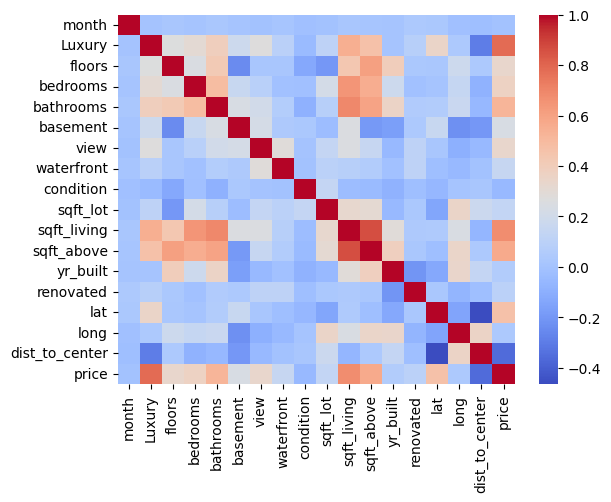

In [10]:
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)

plt.show()

### Regresión Lineal

#### Modelo Completo

Para el primer modelo, apliquemos con todas las variables predictoras. Además, escalaremos las variables numéricas para que todas tengan la misma importancia en el modelo de regresión y se pueda interpretar la explicabilidad de cada una. Recordemos que la variable price ya la venimos arrastrando tranformada con box-cox, con esta transformación no hace falta escalarla.

In [11]:
df_scaled = df.copy()

In [12]:
num_cols = df_scaled.select_dtypes(include=['float']).columns.drop('price')

In [13]:
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

Seleccionamos las variables predictoras. Dejamos al margen para este modelo completo, además de la variable objetivo price, la variable dist_to_center, puesto que la hemos obtenido realizando feature engineering apartir de lat y long, y la regresión lineal es sensible a la colinealidad entre variables predictoras

In [14]:
features = df_scaled.select_dtypes(include=['number', 'object', 'category']).columns.tolist()

features = [col for col in features if col not in ['price', 'dist_to_center']]

In [15]:
import statsmodels.api as sm

Aplicamos dummies a las variables categóricas y las pasamos a float debido a que statsmodel no interpreta booleanos. Luego, añadimos el intercepto y aplicamos el modelo.

In [16]:
X = pd.get_dummies(df_scaled[features], drop_first=True).astype(float)
X = sm.add_constant(X)
y = df['price']

Dividimos en conjunto de entrenamiento y test.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
modelo = sm.OLS(y_train, X_train).fit()

In [19]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     558.6
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:15:20   Log-Likelihood:                 12901.
No. Observations:                4000   AIC:                        -2.574e+04
Df Residuals:                    3970   BIC:                        -2.555e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.9207      0.001   3782.151      0.000       3.919       3.923
sqft_lot                        0.0006      0.000      2.454      0.014       0.000       0.001
sqft_living                     0.0061      0.001      9.106      0.000       0.005       0.007
sqft_above                      0.0024      0.001      3.566      0.000       0.001       0.004
lat                             0.0063      0.000     36.485      0.000       0.006       0.007
long                           -0.0003      0.000     -1.870      0.062      -0.001    1.68e-05
month_[2.50, 3.50)              0.0027      0.001      3.820      0.000       0.001       0.004
month_[3.50, 4.50)              0.0016      0.001      2.373      0.018       0.000       0.003
month_[4.50, 7.50)              0.0005      0.001      0.869      0.385      -0.001       0.002
month_[7.50, inf)              -0.0004      0.001     -0.803      0.422      -0.001       0.001
Luxury_1                        0.0177      0.000     41.875      0.000       0.017       0.019
floors_[1.25, 1.75)            -0.0008      0.001     -1.153      0.249      -0.002       0.001
floors_[1.75, inf)              0.0006      0.001      1.147      0.251      -0.000       0.002
bedrooms_[2.50, 3.50)          -0.0030      0.001     -5.504      0.000      -0.004      -0.002
bedrooms_[3.50, 4.50)          -0.0040      0.001     -6.232      0.000      -0.005      -0.003
bedrooms_[4.50, inf)           -0.0049      0.001     -5.984      0.000      -0.006      -0.003
bathrooms_[1.25, 1.75)          0.0024      0.001      3.370      0.001       0.001       0.004
bathrooms_[1.75, 2.75)          0.0033      0.001      6.553      0.000       0.002       0.004
bathrooms_[2.75, 3.25)          0.0033      0.001      4.402      0.000       0.002       0.005
bathrooms_[3.25, inf)           0.0073      0.001      8.434      0.000       0.006       0.009
basement_1                      0.0014      0.001      2.063      0.039    6.76e-05       0.003
view_1                          0.0062      0.001     10.897      0.000       0.005       0.007
waterfront_1                    0.0120      0.002      6.154      0.000       0.008       0.016
condition_B                    -0.0031      0.001     -5.117      0.000      -0.004      -0.002
condition_C                    -0.0010      0.001     -1.605      0.108      -0.002       0.000
yr_built_[1940.50, 1949.50)    -0.0055      0.001     -7.711      0.000      -0.007      -0.004
yr_built_[1949.50, 1994.50)    -0.0047      0.001     -8.297      0.000      -0.006      -0.004
yr_built_[1994.50, 2009.50)    -0.0025      0.001     -3.555      0.000      -0.004      -0.001
yr_built_[2009.50, inf)        -0.0012      0.001     -1.271      0.204      -0.003       0.001
renovated_1

El modelo explica aproximadamente el 80.2% de la variabilidad en price, lo cual es bastante bueno. Los coeficientes de cada variable se asocian al aumento de la variable objetivo si es positivo, de lo contrario si es negativo y el p-valor indica si este efecto es estadísticamente significativo. Veamos dos ejemplos, uno perteneciente a variables continuas y otro a una dummy de las categóricas:

• sqft_living = 0.0061: Por cada unidad adicional de sqft_lot, el precio aumenta en promedio 0.0061 unidades. El impacto es positivo, es decir, terrenos más grandes tienden a aumentar el precio, aunque el coeficiente es pequeño por la escala de la variable.

• Luxury_1 = 0.0177: Estar en la categoría Luxury aumenta el precio esperado en 0.0176 unidades en comparación con no ser Luxury, mostrando que pertenecer a la categoría de lujo aumenta el precio.

A continuación, hagamos una visualización para entender la importancia de las variables a partir de estos coeficientes dados en la segunda tabla de OLS, en valor absoluto.

In [20]:
summary_frame = modelo.summary2().tables[1].drop(index='const', errors='ignore') # Omitimos el intercepto
summary_frame['abs_coef'] = summary_frame['Coef.'].abs()

Podemos aplicar filtro para incluir solo las variables estadísticamente significativas, y ordenamos según el valor abosuluto de los coeficientes.

In [21]:
significant_vars = summary_frame[summary_frame['P>|t|'] < 0.05].copy()

ranked_vars = significant_vars.sort_values(by='abs_coef', ascending=False) 

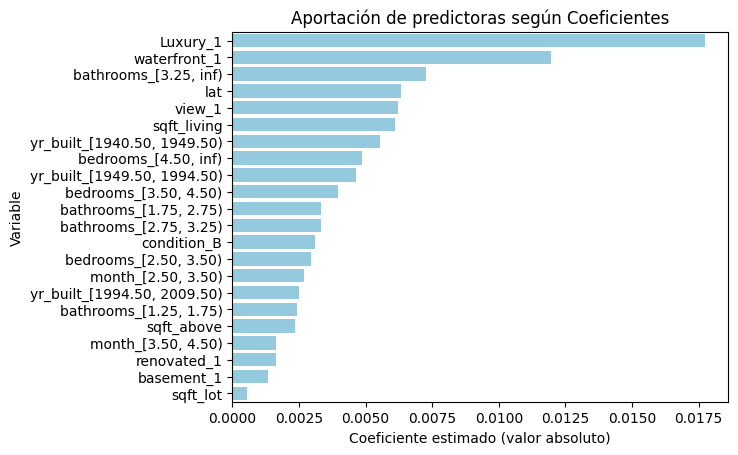

In [22]:
sns.barplot(x='abs_coef', y=ranked_vars.index, data=ranked_vars, color='skyblue')
plt.title('Aportación de predictoras según Coeficientes', fontsize=12)
plt.xlabel('Coeficiente estimado (valor absoluto)')
plt.ylabel('Variable')
plt.show()

Sacando así conclusiones por encima, que la vivienda esté categorizada como lujosa y tenga vistas al mar son características claves para predecir la variable precio, luego también aquellas viviendas que tengan más de 3 baños y lat son buenos predictores.

A continuación, obtenemos el RMSE, que refiere al error cuadrático medio, esto es la raíz cuadrada del promedio de los errores al cuadrado entre los valores reales y los valores predichos por un modelo, es decir, es una métrica que indica cuanto se alejan los valores predichos de los reales.

In [23]:
y_pred_test = modelo.predict(X_test)

rmse = np.sqrt(((y_pred_test - y_test) ** 2).mean())

print(f'RMSE: {rmse:.5f}')

RMSE: 0.00932


Este valor está calculado para la variable price transformada con box-cox, por eso hemos obtenido un valor tan bajo, pero para conocer el valor real, habría que aplicar la inversa de la tranformación a la variable price. Visualicemos como se comportan los residuos.

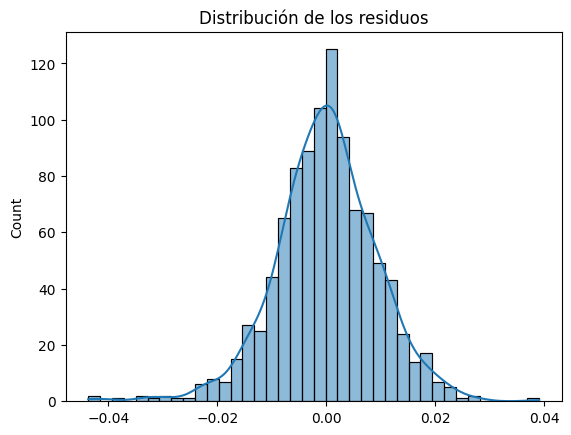

In [24]:
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos")
plt.show()

Se observa que la distribución de los residuos tiene una muy ligera asimetría a la izquierda. Es decir, los valores por el extremo izquierdo de la distribución difieren de seguir una distribución normal, con esto, se entiende que el modelo tiene dificultades para predecir los valores de la variable objetivo price cuanto más bajos son. Esto último expuesto, lo podemos representar mediante un gráfico de dispersión predicciones vs test.

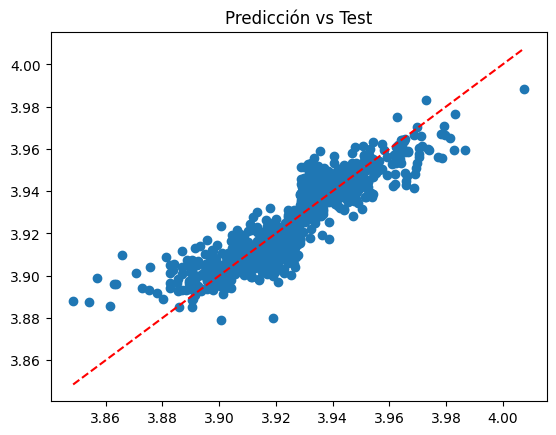

In [25]:
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.title("Predicción vs Test")
plt.show()

Por último, veamos la importancia relativa de las varibales con la librería relativeImp, que aunque tengamos las variables catóricas como dummies, la importancia relativa para estas dummies se acumlaria para cada grupo de variable a la que pertenece, por ello, nos sirve igualmente para entender esta importancia relativa de las variables por aportación al R2, puesto  esta es una buena práctica para intentar simplificar el modelo con un menor número de variables a utilizar, dado que obtendremos las variables que mas importan en el modelo.

In [26]:
df_train = pd.DataFrame(X_train, columns=X.columns).drop(columns='const')
df_train['price'] = y_train.values

In [27]:
rI = relativeImp(df=df_train, outcomeName='price', driverNames=X_train.drop(columns='const').columns.tolist())

rI_sorted = rI.sort_values(by='normRelaImpt', ascending=False)
rI_sorted

,driver,rawRelaImpt,normRelaImpt
9,Luxury_1,0.250233,31.156191
3,lat,0.134722,16.774029
1,sqft_living,0.106603,13.273029
2,sqft_above,0.086772,10.803809
18,"bathrooms_[3.25, inf)",0.037149,4.625308
20,view_1,0.035019,4.360147
19,basement_1,0.026066,3.245479
11,"floors_[1.75, inf)",0.023471,2.922337
13,"bedrooms_[3.50, 4.50)",0.011768,1.465182
25,"yr_built_[1949.50, 1994.50)",0.010809,1.345820


La librería relativeImp ya tiene implementado un método para graficar estas importancias relativas de las variables, pero es poco atractivo visualmente, mejor usar un gráfico de barras.

In [28]:
#rI.plot()

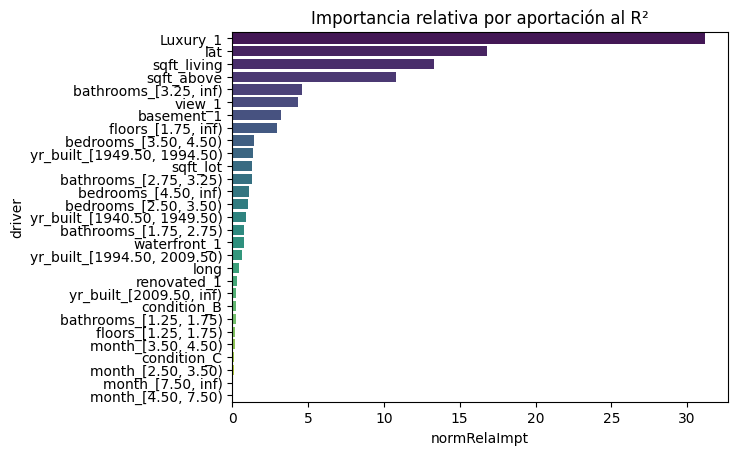

In [29]:
sns.barplot(data = rI_sorted, x='normRelaImpt', y='driver', hue='driver', palette='viridis', legend=False)

plt.title('Importancia relativa por aportación al R²')
plt.show()

Observemos como por ejemplo waterfront, a diferencia de lo visto en los coeficientes del modelo obtenido de statsmodel, no tiene tanto poder de predicción para el modelo en general, esto puede ser debido al desbalanceo de la variable visto en el EDA, y como lat parece ser muy importante. Hacemos un segundo modelo más simple con las variables que parecen predecir mejor la variable objetivo.

#### Segundo Modelo

In [30]:
features1 = ['Luxury', 'view', 'sqft_living', 'sqft_above', 'lat', 'bathrooms']

In [31]:
X = pd.get_dummies(df_scaled[features1], drop_first=True).astype(float)
X = sm.add_constant(X)
y = df['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
modelo = sm.OLS(y_train, X_train).fit()

In [34]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1646.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:15:21   Log-Likelihood:                 12751.
No. Observations:                4000   AIC:                        -2.548e+04
Df Residuals:                    3990   BIC:                        -2.542e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9129      0.000   8617.015      0.000       3.912       3.914
sqft_living                0.0065      0.000     17.333      0.000       0.006       0.007
sqft_above                 0.0010      0.000      3.035      0.002       0.000       0.002
lat                        0.0062      0.000     35.619      0.000       0.006       0.007
Luxury_1                   0.0192      0.000     45.257      0.000       0.018       0.020
view_1                     0.0076      0.001     13.355      0.000       0.006       0.009
bathrooms_[1.25, 1.75)     0.0021      0.001      2.798      0.005       0.001       0.003
bathrooms_[1.75, 2.75)     0.0027      0.000      5.566      0.000       0.002       0.004
bathrooms_[2.75, 3.25)     0.0029      0.001      3.925      0.000       0.001       0.004
bathrooms_[3.25, inf)      0.0071      0.001      8.671      0.000       0.005       0.009
==============================================================================
Omnibus:                      216.791   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.452
Skew:                          -0.355   Prob(JB):                    2.56e-103
Kurtosis:                       4.526   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A costa de prescindir de la gran mayoría de variables, ha disminuido muy poco el R2, esto es bueno, puesto que con tan solo 6 variables tenemos una predicción bastante decente de la variabilidad de la variable objetivo price.

In [35]:
y_pred_test = modelo.predict(X_test)

rmse = np.sqrt(((y_pred_test - y_test) ** 2).mean())

print(f'RMSE: {rmse:.5f}')

RMSE: 0.00963


Construimos un tercer modelo con un menor número de variables aún, buscando quedarnos con un modelo más simple sin empeorar el modelo de cara a la predicción de la variable objetivo. 

#### Tercer Modelo

In [36]:
features2 = ['Luxury', 'sqft_living', 'sqft_above', 'lat']

In [37]:
X = pd.get_dummies(df_scaled[features2], drop_first=True).astype(float)
X = sm.add_constant(X)
y = df['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
modelo = sm.OLS(y_train, X_train).fit()

In [40]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3413.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:15:21   Log-Likelihood:                 12622.
No. Observations:                4000   AIC:                        -2.523e+04
Df Residuals:                    3995   BIC:                        -2.520e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9157      0.000    1.6e+04      0.000       3.915       3.916
sqft_living     0.0086      0.000     24.733      0.000       0.008       0.009
sqft_above      0.0003      0.000      0.969      0.332      -0.000       0.001
lat             0.0061      0.000     33.939      0.000       0.006       0.006
Luxury_1        0.0203      0.000     47.067      0.000       0.019       0.021
==============================================================================
Omnibus:                      165.639   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.658
Skew:                          -0.276   Prob(JB):                     1.18e-76
Kurtosis:                       4.339   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y_pred_test = modelo.predict(X_test)

rmse = np.sqrt(((y_pred_test - y_test) ** 2).mean())

print(f'RMSE: {rmse:.5f}')

RMSE: 0.01012


Con este último modelo, se realiza la evaluación de los distintos modelos de regresión lineal mediante validación cruzada. Se implementa una función cross_val_lin que calcula el coeficiente de determinación para varios modelos, definidos por diferentes fórmulas, y se presentan los resultados de manera clara en un DataFrame.

#### Validación Cruzada

Implementamos validación cruzada para los tres modelos contemplados. Esto ayuda a estimar cómo generalizará cada modelo a datos no vistos, reduciendo el riesgo de overfitting o underfitting, para luego tener una mejor valoración final de elección de nuestro modelo.

In [42]:
def cross_val_sm(features, df, y, n_splits=5, n_repeats=20):
    X_raw = df[features]
    X_encoded = pd.get_dummies(X_raw, drop_first=True).astype(float)
    X_encoded = sm.add_constant(X_encoded)

    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=61)

    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in rkf.split(X_encoded):
        X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    return {
        'R2_mean': np.mean(r2_scores),
        'R2_std': np.std(r2_scores),
        'RMSE_mean': np.mean(rmse_scores)
    }

Mediante el *RepeatedKFold*, se llevarán a cabo un total de 100 iteraciones: 

• 5 particiones (splits): 4 *trains* y 1 *test*, que van rotando sobre todas las combinaciones de las particiones. 

• 20 repeticiones (repeats): El proceso KFold se realiza 20 veces con diferentes particiones.

Cada iteración generará un R², proporcionando un promedio del R² de cada modelo y una medida de la variabilidad que indica la consistencia del modelo en difrentes particiones, obteniendo así un ajuste de capacidad de generalización de cada modelo.

In [43]:
list_features = [features, features1, features2]

cross_val_results = [cross_val_sm(f, df_scaled, df['price']) for f in list_features]

cross_val_df = pd.DataFrame(cross_val_results)
cross_val_df.index = ['Modelo 1', 'Modelo 2', 'Modelo 3']
cross_val_df.index.name = 'Modelo'

cross_val_df

,R2_mean,R2_std,RMSE_mean
Modelo,,,
Modelo 1,0.799016,0.009708,0.009614
Modelo 2,0.785714,0.009220,0.009928
Modelo 3,0.770206,0.009743,0.010282


Evidenciamos que los tres modelos evaluados generalizan correctamente ante nuevos datos no vistos. Debido a lo ya expuesto anteriormente, el modelo que ofrece una mejor explicabilidad sin penalizar demasiado la predicción de la variable objetivo es el modelo 2, con un coeficiente de determinación bastante bueno muy poco inferior respecto al modelo completo reduciendo dráscticamente el número de variables.

## Modelo Gradient Boosting Regressor (CatBoost)
No conformes con la obtención de un buen resultado con un modelo tradicional, adicionalmente se probará con algún modelo de los denominados ensamblados, basados en arboles de decisión. Debido a que tenemos variables categoricas en nuestro dataset, se empleará el modelo CatBoost, un modelo tipo gradient boosting que no es sensible a la presencia de variables categóricas en nuestro dataframe, y no es necesario transformar dichas variables con algún Encoding, para facilitar este último apartado adicional.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   month           5000 non-null   category
 1   Luxury          5000 non-null   category
 2   floors          5000 non-null   category
 3   bedrooms        5000 non-null   category
 4   bathrooms       5000 non-null   category
 5   basement        5000 non-null   category
 6   view            5000 non-null   category
 7   waterfront      5000 non-null   category
 8   condition       5000 non-null   category
 9   sqft_lot        5000 non-null   float64 
 10  sqft_living     5000 non-null   float64 
 11  sqft_above      5000 non-null   float64 
 12  yr_built        5000 non-null   category
 13  renovated       5000 non-null   category
 14  lat             5000 non-null   float64 
 15  long            5000 non-null   float64 
 16  dist_to_center  5000 non-null   float64 
 17  price         

In [45]:
features = df.select_dtypes(include=['number', 'object', 'category']).columns.tolist()

features = [col for col in features if col != 'price']

In [46]:
X = df[features]
y = df['price']

Además, debemos extraer los índices de las variables categóricas para indicarselas al modelo CatBoost.

In [47]:
cat_cols = df.select_dtypes(include = ['category']).columns

cat_index = [df.columns.get_loc(i) for i in cat_cols]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

Para hacer emplear un modelo CatBoost, haremos uso de su framework Pool, esto es un contenedor especial con estructura optimizada para manejar datos que CatBoost utiliza para gestionar eficientemente los datos de entrada garantizando que el manejo de datos sea homogéneo durante entrenamiento, validación y explicación.

In [49]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_index)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_index)

Previamente a aplicar un modelo cualquiera, usemos la librería GridSearch para buscar cuales son los mejores parámetros para aplicar en nuestro modelo CatBoost.

In [50]:
model = CatBoostRegressor(loss_function='RMSE', silent=True, cat_features=cat_index)

Display de parámetros a valorar como adecuados para nuestro modelo, estos son:

• Depth: Profundidad máxima de los árboles, influye en la complejidad del modelo para ajustar, una profundidad alta puede inducir al overfitting.   
• Iterations: Número total de árboles, que afecta la capacidad de aprendizaje, también induce al overfitting pero en menor medida.  
• Learning rate: Tasa de aprendizaje que controla el tamaño de los pasos de ajuste, cuanto menor es este valor más se reduce el riesgo de overfitting.  
• L2 regularization: Regularización L2 para evitar overfitting.

Así, el GridSearch busca la combinación que minimice el error en validación cruzada.

In [51]:
param_grid = {
    'learning_rate': [0.01, 0.5, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}

In [52]:
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

#grid_search.fit(X_train, y_train)

Para evitar los 7 minutos que me ha durado en mi PC ejecutar el GridSearch, lo dejo comentado y guardo el set de mejores parámetros en best_params.json, así se puede leer directamente desde ahí como diccionario para usar en el modelo.

In [53]:
#best_params = grid_search.best_params_

#with open("best_params.json", "w") as f:
    #json.dump(best_params, f, indent=4)

In [54]:
with open("best_params.json", "r") as f:
    best_params = json.load(f)

In [55]:
print(best_params)

{'depth': 6, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


Aplicamos el modelo CatBoostRegressor con RMSE en loss_function, así el modelo intenta minimizar esta métrica durante el entrenamiento, lo que significa que el objetivo del modelo es reducir el error cuadrático medio entre las predicciones y los valores reales, de esta manera permite al modelo ajustarse para hacer predicciones lo más precisas posible. Respecto al resto de hiperparámetros, utilizamos los dados por GridSearch.

In [56]:
model = CatBoostRegressor(
    **best_params,       
    cat_features = cat_index,
    loss_function='RMSE',
    silent=True)

In [57]:
model.fit(train_pool, eval_set=test_pool)

y_pred = model.predict(test_pool)

In [58]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.007378177837569013
R²: 0.8856672785489843


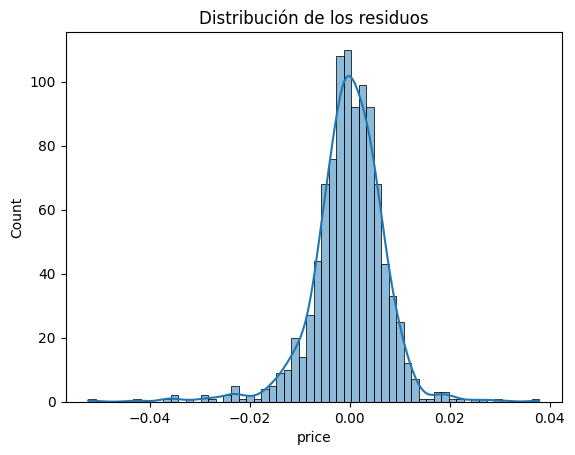

In [59]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos")
plt.show()

También podemos ver cuanto se han alejado las predicciones de la realidad con un gráfico de dispersión.

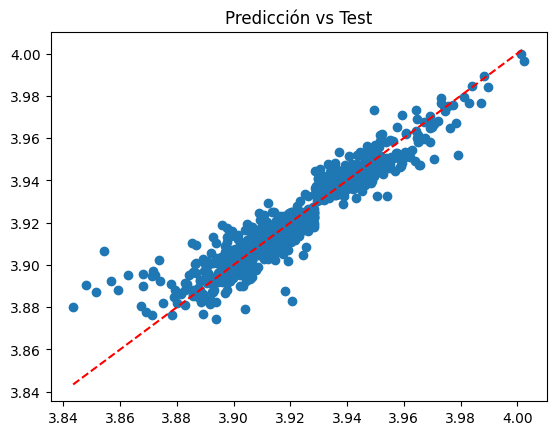

In [60]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.title("Predicción vs Test")
plt.show()

Observemos también cuales son las variables que más importancia tienen en el modelo.

In [61]:
importances = model.get_feature_importance()

In [62]:
importances_df = pd.DataFrame({
    'Feature': model.feature_names_,
    'Importance': importances
})

In [63]:
print(importances_df.sort_values(by='Importance', ascending=False))

           Feature  Importance
1           Luxury   31.231374
14             lat   24.041938
10     sqft_living   11.065178
11      sqft_above    7.256646
16  dist_to_center    5.639318
15            long    5.579790
4        bathrooms    4.667555
9         sqft_lot    2.661008
6             view    2.005484
12        yr_built    1.366177
8        condition    0.979975
7       waterfront    0.707023
5         basement    0.694674
2           floors    0.679687
3         bedrooms    0.640898
0            month    0.609161
13       renovated    0.174113


Por último, implementemos el Shap que ofrece CatBoost para buscar explicabilidad de las variables sobre nuestro modelo catboosting. El gráfico SHAP muestra cómo cada variable influye en la predicción. El color indica si el valor de la variable es alto (rojo) o bajo (azul), y la posición en el eje X muestra si ese valor aumenta o reduce la predicción (a la derecha o izquierda de 0). Los puntos grises corresponden a variables categóricas, sin un gradiente numérico asociado.

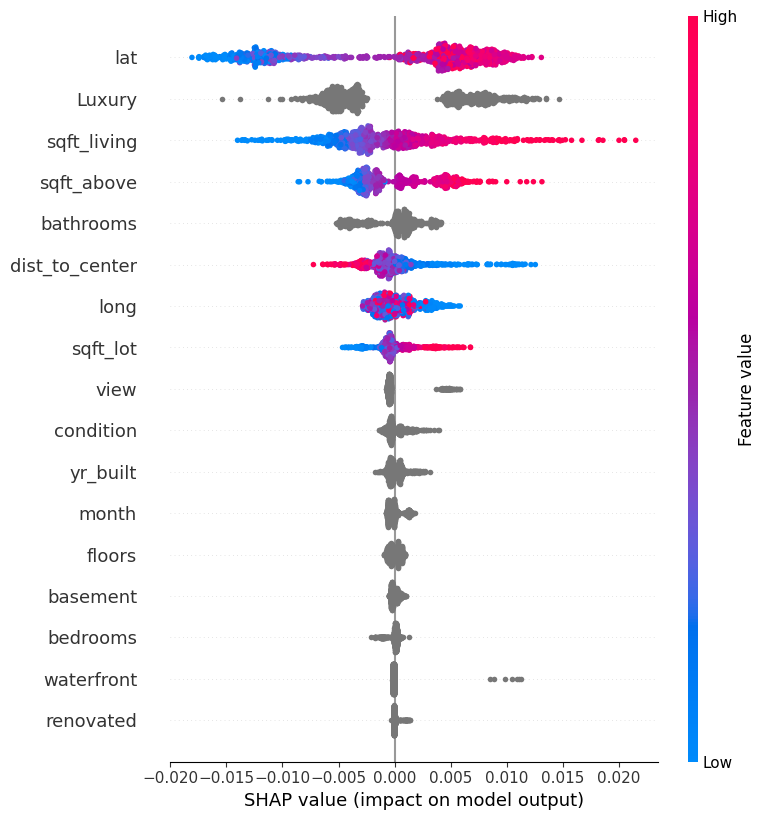

In [64]:
shap_values = model.get_feature_importance(test_pool, type='ShapValues')
shap_values = shap_values[:, :-1]

shap.summary_plot(shap_values, X_test)

Con el CatBoost obtenemos un RMSE = 0.007 (no olvidemos que seguimos arrastrando la variable objetivo transformada), un valor bajo con el que nuestro modelo realiza predicciones muy cercanas a los valores reales, además, se incrementa notoriamente el R². Esta mejora respecto a la regresión lineal, viene dada por la captación de no linealidades del modelo CatBoost que la regresión lineal no es capaz.

Analizando los residuos de igual forma que en la regresión lineal, el modelo CatBoost sigue teniendo dificultades para predecir correctamente los valores reales bajos de la variable objetivo en test, esto se puede contrastar en el gráfico de dispersión.

## Autor: Alfonso Guisado González